In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
import pickle

In [2]:
# taking data from files
with open('../data/test.pkl', 'rb') as file1:
    data = pickle.load(file1)
with open('../data/train.pkl', 'rb') as file2:
    data2 = pickle.load(file2)

In [3]:
# shuffling data
np.random.shuffle(data2)
np.random.shuffle(data)

In [4]:
# splitting data into coordinates
x = data2[:,:-1]
y = data2[:,1]
test_x = data[:,:-1]
test_y = data[:,1]

In [5]:
# initialising tables
v_table = np.zeros((10,10))
b_table = np.zeros((10,10))

In [6]:
# initialising arrays
bias = np.zeros((20))
bias2_avg = np.zeros((20))
var_avg = np.zeros((20))
err_avg = np.zeros((20))
tot_avg = np.zeros((20))
irr_avg = np.zeros((20))
xarr = np.zeros((20))

In [7]:
# splitting training set into 10 parts
train_x = np.array((np.array_split(x, 10)))
train_y = np.array((np.array_split(y, 10)))

In [8]:
for degree in range (1,21):

    res1 = np.zeros((10,80))
    res2 = np.zeros((10,80))
    #for training set
    for i in range (0,10):
        poly = PolynomialFeatures(degree=degree, include_bias=False)

        #Transform the polynomial features as required ans training model
        X = poly.fit_transform(train_x[i])
        reg = LinearRegression()
        reg.fit(X, train_y[i])
        X_TEST = poly.fit_transform(test_x)
        y_predict = reg.predict(X_TEST)

        res1[i] = y_predict
        res2[i] = (test_y - y_predict)**2

    #calculate bias
    point_avg=np.mean(res1,axis=0)
    bias2_avg[degree-1]=np.mean((point_avg-test_y)**2)
    bias[degree-1]=np.mean(np.abs((point_avg-test_y)))
    new_avg=np.mean(res2, axis=0)
    #calculate variance
    point_var = np.var(res1,axis=0)
    var_avg[degree-1]=np.mean(point_var)
    #irreducible error calc
    err_avg[degree-1]=np.mean(new_avg) - (bias2_avg[degree-1] + var_avg[degree-1])
    # total error calc
    tot_avg[degree-1]=np.mean(new_avg)

In [9]:
fin_avg = np.mean(err_avg)
#initialising x for graph
use = np.zeros((20))
for degree in range (1,21):
    use[degree-1] = fin_avg
    xarr[degree-1] = degree

In [10]:
# table 1
bias_table=pandas.DataFrame({'Degree':np.array(range(1,21)),'Bias':bias,'Variance': var_avg, 'Total Error': tot_avg})
print(bias_table.to_string(index=False))
print('')

 Degree       Bias      Variance  Total Error
      1 820.172615  30091.061315 1.033113e+06
      2 811.242132  37359.953034 9.920671e+05
      3  68.069973  61235.767101 7.035284e+04
      4  75.472918  78802.765110 8.733495e+04
      5  74.330381 115351.310086 1.233312e+05
      6  72.174942 127260.376173 1.348972e+05
      7  78.470913 151801.408890 1.604252e+05
      8  81.848954 189952.051011 1.991105e+05
      9  80.147093 221790.066578 2.303207e+05
     10  85.800684 279649.144823 2.905225e+05
     11  81.869563 262274.434325 2.719595e+05
     12 112.902990 277919.792250 3.030966e+05
     13  84.124928 309753.571896 3.226937e+05
     14 118.579466 278220.370599 3.126092e+05
     15 156.907008 297281.046054 3.544232e+05
     16 160.059102 283385.825839 3.466258e+05
     17 232.043019 302469.429728 4.090427e+05
     18 232.454650 292269.062717 4.035773e+05
     19 298.575394 310326.108118 4.893000e+05
     20 298.247800 302514.183073 4.859094e+05



In [11]:
# table 2
error_table=pandas.DataFrame({'Degree':np.array(range(1,21)), 'Irreducible Error':err_avg[:]})
print(error_table.to_string(index=False))

 Degree  Irreducible Error
      1       0.000000e+00
      2       1.164153e-10
      3      -1.455192e-11
      4       1.455192e-11
      5       2.910383e-11
      6       0.000000e+00
      7       0.000000e+00
      8      -2.910383e-11
      9       2.910383e-11
     10       1.164153e-10
     11       0.000000e+00
     12      -1.164153e-10
     13       0.000000e+00
     14      -5.820766e-11
     15       0.000000e+00
     16      -5.820766e-11
     17       1.164153e-10
     18      -5.820766e-11
     19       1.746230e-10
     20       0.000000e+00


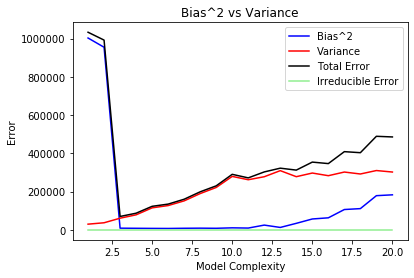

In [12]:
plt.plot(xarr[:], bias2_avg[:], label='Bias^2', color = 'blue')
plt.plot(xarr[:], var_avg[:],label='Variance', color = 'red')
plt.plot(xarr[:], tot_avg[:],label='Total Error', color = 'black')
plt.plot(xarr[:], err_avg[:],label='Irreducible Error', color = 'lightgreen')
plt.ylabel('Error', fontsize='medium')
plt.xlabel('Model Complexity', fontsize='medium')
plt.title("Bias^2 vs Variance")
plt.legend()
plt.show()

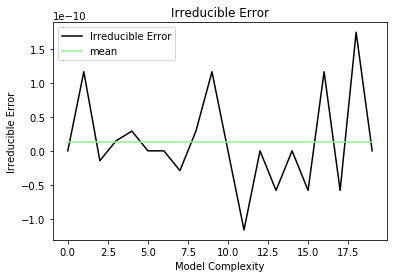

In [13]:
plt.xlabel('Model Complexity', fontsize='medium')
plt.ylabel('Irreducible Error', fontsize='medium')
plt.title("Irreducible Error")
plt.plot(err_avg[:],label='Irreducible Error', color = 'black')
plt.plot(use[:],label='mean', color='lightgreen')
plt.legend()
plt.show()